In [ ]:
import pandas as pd
import os

In [ ]:
#names = ['Mean_Raw_HR']


#read in csv file and print 1st 10 and last 10 rows
df = pd.read_csv(

    "/content/Minute_level_Data.csv",
    dtype={'user_id': int}


)

unique_count = df['P_ID'].nunique()

print("Number of unique strings in 'P_ID' column:", unique_count)


df.sort_values(['P_ID', 'Day_Num', 'Trips'], inplace=True)

# Print the reorganized dataframe
print(df.head)

df.to_csv('COLABTRANSFORMER.csv', index=False)


<ipython-input-2-803ce308193d>:5: DtypeWarning: Columns (71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Number of unique strings in 'P_ID' column: 60
<bound method NDFrame.head of        P_ID Day_Num  Trip_Time  Trips  Weather_Info  Mean_Raw_HR  \
43     P100    Day1    Morning  Trip1             1    99.166667   
44     P100    Day1    Morning  Trip1             1   100.700000   
45     P100    Day1    Morning  Trip1             1    91.000000   
46     P100    Day1    Morning  Trip1             1    91.916667   
47     P100    Day1    Morning  Trip1             1    94.416667   
...     ...     ...        ...    ...           ...          ...   
16198   P99    Day7  Afternoon  Trip2             1    98.333333   
16199   P99    Day7  Afternoon  Trip2             1    96.000000   
16200   P99    Day7  Afternoon  Trip2             1    93.000000   
16201   P99    Day7  Afternoon  Trip2             1   100.916667   
16202   P99    Day7  Afternoon  Trip2             1   100.500000   

       Mean_NR_HR_SD  Mean_NR_HR_2SD  Mean_NR_HR_Global  Mean_Speed  ...  \
43         20.629217       36.2

In [ ]:
df.columns

Index(['P_ID', 'Day_Num', 'Trip_Time', 'Trips', 'Weather_Info', 'Mean_Raw_HR',
       'Mean_NR_HR_SD', 'Mean_NR_HR_2SD', 'Mean_NR_HR_Global', 'Mean_Speed',
       'SD_Speed', 'Mean_ATP', 'SD_ATP', 'Mean_RTP', 'SD_RTP', 'Mean_JF',
       'SD_JF', 'Mean_FF', 'SD_FF', 'Mean_FF_Speed', 'Mean_Acc_energy',
       'SD_Acc_energy', 'Mean_Rot_energy', 'SD_Rot_energy', 'Day_Ind', 'Age',
       'Gender', 'State', 'DrExp', 'Mil', 'WoMo', 'Comm', 'CommD', 'CommT',
       'RdTr', 'DrLike', 'Brand', 'Model', 'Year', 'DrMo', 'Drive_SAE5',
       'Activities_SAE5', 'DrNi', 'DrTraf', 'Park', 'Acc', 'RolCoa', 'EnFwy',
       'PsgAcc', 'DrRain', 'TiredDr', 'Flyer', 'MusicDr', 'TextDr', 'TalkDr',
       'CoffeeDr', 'AbsMinDr', 'Upsetrdr', 'Tickets', 'Crash', 'RdRg',
       'ReRdRg', 'Trait_Anxiety', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Height_feet',
       'Height_Inch', 'Weight', 'Dominant_Hand', 'Watch_Hand',
       'Phone_Text_Hand', 'City', 'Occupatio

In [ ]:

""" #Splitting Data into test set and train set in seperate data frames

df_train = df[df['P_ID']<'P89']
df_test = df[df['P_ID']>'P90']


hr_train = df_train['Mean_Raw_HR'].tolist()
hr_test = df_test['Mean_Raw_HR'].tolist()


#adding speed and FF to training data...
#not adding to test bc Im assuming that is what its predicting
hr_train += df_train['Mean_Speed'].tolist()
#hr_train += df_train['Mean_FF'].tolist()
#hr_test += df_test['Mean_Speed'].tolist()


print("Training set has {} observations".format(len(hr_train)))
print("Test set has {} observations".format(len(hr_test))) """
from sklearn.model_selection import train_test_split

"""
# Get unique 'P_ID' values
unique_ids = df['P_ID'].unique()

# Split the unique 'P_ID' values into train and test groups
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

print(train_ids)
print(test_ids)

# Filter the original DataFrame based on the train and test groups
train_df = df[df['P_ID'].isin(train_ids)]
#print(train_df)
test_df = df[df['P_ID'].isin(test_ids)]
#print(test_df)

# Extract the 'Mean_Raw_HR' values for train and test sets
hr_train = train_df['Mean_Raw_HR']
print(hr_train)
hr_test = test_df['Mean_Raw_HR']
print(hr_test)
"""
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your DataFrame df

# Group by 'P_ID', 'Day_Num', and 'Trips' and calculate the 80-20 split index for each group
train_indices = []
test_indices = []

grouped = df.groupby(['P_ID', 'Day_Num', 'Trips'])
for _, group in grouped:
    # Calculate the index for the 80% split
    eighty_percent_index = int(0.8 * len(group))

    # Split the indices for the group
    train_indices.extend(group.index[:eighty_percent_index])
    test_indices.extend(group.index[eighty_percent_index:])

# Create the train and test DataFrames
train_df = df.loc[train_indices]
test_df = df.loc[test_indices]

# Print the shapes to verify the split
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Extract the 'Mean_Raw_HR' values for train and test sets
hr_train = train_df[['Mean_Raw_HR']]

print(hr_train)
hr_test = test_df[['Mean_Raw_HR']]
print(hr_test)





print("Training set has {} observations".format(len(hr_train)))
print("Test set has {} observations".format(len(hr_test)))

print(hr_test)


Train shape: (12657, 90)
Test shape: (3567, 90)
       Mean_Raw_HR
43       99.166667
44      100.700000
45       91.000000
46       91.916667
47       94.416667
...            ...
16187    91.083333
16188    91.750000
16189    87.500000
16190    87.833333
16191    89.166667

[12657 rows x 1 columns]
       Mean_Raw_HR
51      106.000000
52       88.916667
53      103.333333
37       93.090909
38       90.833333
...            ...
16198    98.333333
16199    96.000000
16200    93.000000
16201   100.916667
16202   100.500000

[3567 rows x 1 columns]
Training set has 12657 observations
Test set has 3567 observations
       Mean_Raw_HR
51      106.000000
52       88.916667
53      103.333333
37       93.090909
38       90.833333
...            ...
16198    98.333333
16199    96.000000
16200    93.000000
16201   100.916667
16202   100.500000

[3567 rows x 1 columns]


In [ ]:
print("Train sample:")
print(train_df.head())

print("Test sample:")
print(test_df.head())

Train sample:
    P_ID Day_Num Trip_Time  Trips  Weather_Info  Mean_Raw_HR  Mean_NR_HR_SD  \
43  P100    Day1   Morning  Trip1             1    99.166667      20.629217   
44  P100    Day1   Morning  Trip1             1   100.700000      22.162550   
45  P100    Day1   Morning  Trip1             1    91.000000      12.462550   
46  P100    Day1   Morning  Trip1             1    91.916667      13.379215   
47  P100    Day1   Morning  Trip1             1    94.416667      15.879216   

    Mean_NR_HR_2SD  Mean_NR_HR_Global  Mean_Speed  ...  Morning_Traffic  \
43       36.235257          19.170667   20.477778  ...            Light   
44       37.768590          20.704000    0.000000  ...            Light   
45       28.068590          11.004000   33.113889  ...            Light   
46       28.985257          11.920667   31.013889  ...            Light   
47       31.485257          14.420667   19.955555  ...            Light   

    Afternoon_Traffic  Weekend_Commute_Work  State_Anxiety  

In [ ]:
import numpy as np


# pass in HR (obs) and sequence which is fragment of
# data to guess the last in the sequence
# After first (seq_size) the window will then slide over one so
#                      1->10 will become 2->11
# Always trying to predict last in sequence
"""
def to_sequences(seq_size, obs):
    x=[]
    y=[]

    for i in range(len(obs)-seq_size):
        window = obs[i:(i+seq_size)]
        after_window = obs[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)
"""
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs) - seq_size):
        window = obs[i:(i + seq_size)]  # Slicing will work with pandas Series
        after_window = obs.iloc[i + seq_size]

        # Check for any missing values in the window
        rows_with_missing_values = np.isnan(window).any(axis=1)

        # Check for any 0 values in the window
        rows_with_zeros = (window == 0).any(axis=1)

        # If there are no missing or 0 values in the window, proceed with appending to x and y
        if not np.any(rows_with_missing_values) and not np.any(rows_with_zeros):
            window = window[['Mean_Raw_HR']].values.tolist()
            x.append(window)
            y.append(after_window['Mean_Raw_HR'])

    return np.array(x), np.array(y)







seq_size = 3 # going to change....

"""
# Use the updated to_sequences function
x_train, y_train = to_sequences(seq_size, hr_train, p_ids_train)
x_test, y_test = to_sequences(seq_size, hr_test, p_ids_test)
""" # P_IDS ????


# Convert 'Mean_Raw_HR' values from train_df and test_df to NumPy arrays
#hr_train = hr_train.to_numpy()
#hr_test = hr_test.to_numpy()


# Use the updated to_sequences function
x_train, y_train = to_sequences(seq_size, hr_train)
x_test, y_test = to_sequences(seq_size, hr_test)

#print(x_test)

# Will print the elements, seq size, window that were trying to predict
print("Shape of training set: {}".format(x_train.shape))
print("Shape of training set: {}".format(x_test.shape))

print(x_train)

Shape of training set: (12654, 3, 1)
Shape of training set: (3564, 3, 1)
[[[ 99.16666667]
  [100.7       ]
  [ 91.        ]]

 [[100.7       ]
  [ 91.        ]
  [ 91.91666667]]

 [[ 91.        ]
  [ 91.91666667]
  [ 94.41666667]]

 ...

 [[ 88.5       ]
  [ 91.08333333]
  [ 91.75      ]]

 [[ 91.08333333]
  [ 91.75      ]
  [ 87.5       ]]

 [[ 91.75      ]
  [ 87.5       ]
  [ 87.83333333]]]


In [ ]:
print(x_train.shape)

(12410, 3, 7)


In [ ]:
!conda update tensorflow

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ahmadmohammad/opt/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    curl-8.1.1                 |       h6c40b1e_0          84 KB
    cython-0.29.35             |   py38hcec6c5f_0         2.0 MB
    huggingface_hub-0.15.1     |   py38hecd8cb5_0         296 KB
    imageio-2.31.1             |   py38hecd8cb5_0         471 KB
    jupyter_server_terminals-0.4.4|   py38hecd8cb5_1          26 KB
    jupyter_server_ydoc-0.8.0  |   py38hecd8cb5_1          23 KB
    libcurl-8.1.1              |       ha585b31_0         359 KB
    libnghttp2-1.52.0          |       h1c88b7d_1         662 KB

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model2 = build_model(
    input_shape,
    head_size=256,
    num_heads=8,
    ff_dim=8,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)




#model = model2

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
159/159 [==============================] - 20s 65ms/step - loss: 5656.7388 - val_loss: 2687.8301
Epoch 2/20
159/159 [==============================] - 10s 64ms/step - loss: 1482.0785 - val_loss: 251.4846
Epoch 3/20
159/159 [==============================] - 9s 58ms/step - loss: 486.5692 - val_loss: 48.5763
Epoch 4/20
159/159 [==============================] - 10s 60ms/step - loss: 423.7428 - val_loss: 43.7289
Epoch 5/20
159/159 [==============================] - 10s 61ms/step - loss: 398.1260 - val_loss: 42.1268
Epoch 6/20
159/159 [==============================] - 8s 53ms/step - loss: 367.1477 - val_loss: 39.5783
Epoch 7/20
159/159 [==============================] - 10s 60ms/step - loss: 354.1998 - val_loss: 39.3101
Epoch 8/20
159/159 [==============================] - 10s 64ms/step - loss: 331.6177 - val_loss: 39.5269
Epoch 9/20
159/159 [==============================] - 9s 59ms/step - loss: 314.4006 - val_loss: 39.7114
Epoch 10/20
159/159 [==============================] 

62.38316345214844

In [ ]:
# means +- 6.8ish HR

#JF-,

# Got 6.4 RMSE by adding speed to train set

"""
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
"""
import pandas as pd
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))

# Reshape the pred array to match the shape of y_test
pred = pred.reshape(-1, 1)

# Create a DataFrame to display predictions and actual values side by side
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

print("Predictions and Actual Values:")
print(predictions_df)

# Reset pandas options to default
pd.reset_option('display.max_rows')

print("Score (RMSE): {}".format(score))


112/112 [==============================] - 2s 15ms/step
Predictions and Actual Values:
          Actual   Predicted
0      93.090909   96.233116
1      90.833333   95.870773
2      90.153846   92.943176
3      88.000000   89.924393
4      85.777778   88.388580
5      85.545455   86.424576
6      87.000000   84.918953
7      86.000000   84.964493
8      90.416667   85.219521
9      90.583333   86.689034
10    101.000000   88.624481
11    100.750000   93.379562
12    108.000000   98.124100
13     95.916667  102.707260
14    102.400000  101.111305
15    108.500000   99.593246
16     97.166667  102.674911
17    100.916667  102.152573
18     97.800000   99.702156
19     84.000000   98.224854
20    106.500000   91.411804
21     95.500000   93.510139
22     81.333333   97.161034
23    115.600000   89.974785
24    113.000000   94.650612
25     89.923077  106.830185
26     93.583333  102.555542
27     95.583333   94.061401
28     85.769231   92.692017
29     98.833333   90.255646
30     91.0000

112/112 [==============================] - 2s 14ms/step


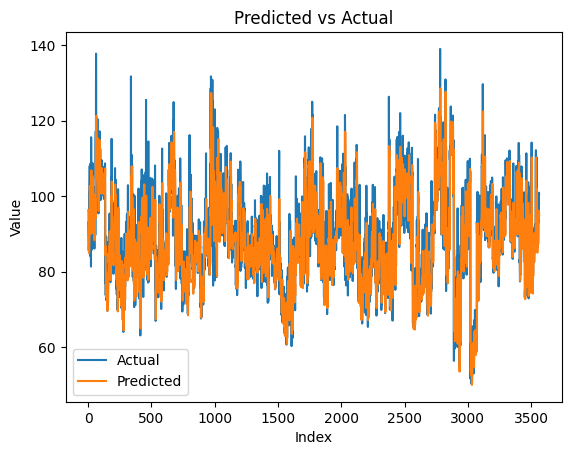

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated 'pred', 'y_test', and 'score'
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))

# Reshape the pred array to match the shape of y_test
pred = pred.reshape(-1, 1)

# Create a DataFrame to display predictions and actual values side by side
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

# Plot the line graph
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual')
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


In [ ]:
#MAE, MSE,
#Evaluation Parameters
# Careful Cross Validation Makes sure no overfitting

#More Plots on how training is done and more explanation


mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, pred)

print("Mean Absolute Error (MAE): {}".format(mae))
print("Mean Squared Error (MSE): {}".format(mse))
print("Root Mean Squared Error (RMSE): {}".format(rmse))
print("R-squared (R2) Score: {}".format(r2_score))

Mean Absolute Error (MAE): 5.583142363130041
Mean Squared Error (MSE): 62.383167040923134
Root Mean Squared Error (RMSE): 7.898301528868288
R-squared (R2) Score: 0.597369972175121


In [ ]:
# take data from every day morning/evening for every situation
# fine tuning
# architecture diagram
